In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_stat_map
from nilearn.glm import threshold_stats_img
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img
from nilearn.plotting import  plot_glass_brain

In [2]:
BASE = "/local/anpa/ds003242-1.0.0"
DERIVATIVES = f"{BASE}/derivatives/"
DERIV_OUT = f"{DERIVATIVES}/firstlevel/"  

In [3]:
all_sub_dirs = sorted([p.name.split("sub-")[-1] for p in Path(DERIV_OUT).glob("sub-*") if p.is_dir()])
all_sub_dirs[:3]

['SAXSISO01b', 'SAXSISO01f', 'SAXSISO01s']

In [4]:
fasting_participants = [s for s in all_sub_dirs if s.endswith("f")]
social_participants = [s for s in all_sub_dirs if s.endswith("s")]
baseline_participants = [s for s in all_sub_dirs if s.endswith("b")]

In [ ]:
fasting_maps = [(f"{DERIV_OUT}sub-{s}/food_gt_control_effsize.nii.gz") for s in fasting_participants]
social_maps = [(f"{DERIV_OUT}sub-{s}/food_gt_control_effsize.nii.gz") for s in social_participants]
baseline_maps = [(f"{DERIV_OUT}sub-{s}/food_gt_control_effsize.nii.gz") for s in baseline_participants]

# Fasting VS baseline
## food > control

In [6]:
n_subjects = len(fasting_participants)
n_subjects

22

In [7]:
# Should I also pass effect_variance?
second_level_input = fasting_maps + baseline_maps
second_level_input

['/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO01f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO02f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO03f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO04f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO08f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO09f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO10f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO11f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO12f/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO13f/food_gt_contr

In [8]:
condition_effect = np.hstack(([1] * n_subjects, [0] * n_subjects))
condition_effect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
subject_effect

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,

In [10]:
subjects = [p[:-1] for p in fasting_participants]
subjects

['SAXSISO01',
 'SAXSISO02',
 'SAXSISO03',
 'SAXSISO04',
 'SAXSISO08',
 'SAXSISO09',
 'SAXSISO10',
 'SAXSISO11',
 'SAXSISO12',
 'SAXSISO13',
 'SAXSISO14',
 'SAXSISO15',
 'SAXSISO17',
 'SAXSISO18',
 'SAXSISO19',
 'SAXSISO21',
 'SAXSISO22',
 'SAXSISO24',
 'SAXSISO26',
 'SAXSISO27',
 'SAXSISO28',
 'SAXSISO30']

In [11]:
unpaired_design_matrix = pd.DataFrame(
    {
        "fasting vs baseline": condition_effect,
        "intercept": 1,
    }
)
unpaired_design_matrix


,fasting vs baseline,intercept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [12]:
paired_design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=["fasting vs baseline", *subjects],
)
paired_design_matrix

,fasting vs baseline,SAXSISO01,SAXSISO02,SAXSISO03,SAXSISO04,SAXSISO08,SAXSISO09,SAXSISO10,SAXSISO11,SAXSISO12,...,SAXSISO17,SAXSISO18,SAXSISO19,SAXSISO21,SAXSISO22,SAXSISO24,SAXSISO26,SAXSISO27,SAXSISO28,SAXSISO30
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'paired design')

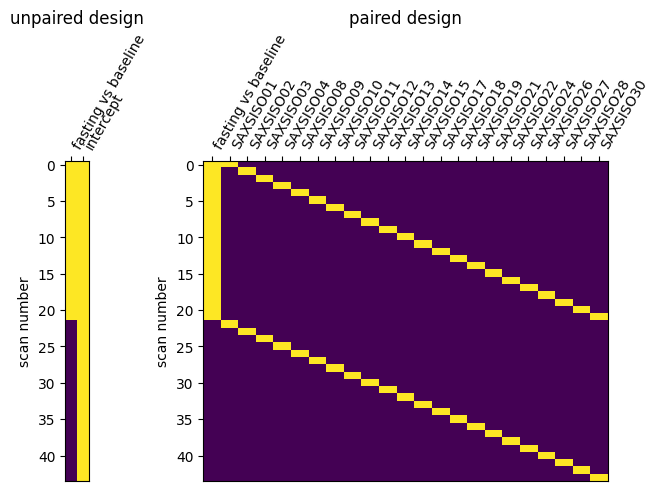

In [13]:

_, (ax_unpaired, ax_paired) = plt.subplots(
    1,
    2,
    gridspec_kw={"width_ratios": [1, 17]},
    constrained_layout=True,
)


plot_design_matrix(unpaired_design_matrix, rescale=False, axes=ax_unpaired)
plot_design_matrix(paired_design_matrix, rescale=False, axes=ax_paired)
ax_unpaired.set_title("unpaired design", fontsize=12)
ax_paired.set_title("paired design", fontsize=12)


In [14]:
from nilearn.glm.second_level import SecondLevelModel

second_level_model_unpaired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=unpaired_design_matrix
)

In [15]:
second_level_model_paired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=paired_design_matrix
)

In [16]:
stat_maps_unpaired = second_level_model_unpaired.compute_contrast(
    "fasting vs baseline", output_type="all"
)
stat_maps_unpaired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7f2b77fc8250>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7f2b4f1e7730>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7f2b74259e80>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7f2b4f1f3820>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7f2b4f1f3e20>}

In [17]:
stat_maps_paired = second_level_model_paired.compute_contrast(
    "fasting vs baseline", output_type="all"
)
stat_maps_paired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7f2b4f24de50>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7f2b4f1e7640>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7f2b4f211af0>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7f2b4f211040>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7f2b4f211940>}

In [18]:
(
    stat_maps_unpaired["effect_size"].get_fdata()
    - stat_maps_paired["effect_size"].get_fdata()
).max()

6.106226635438361e-16

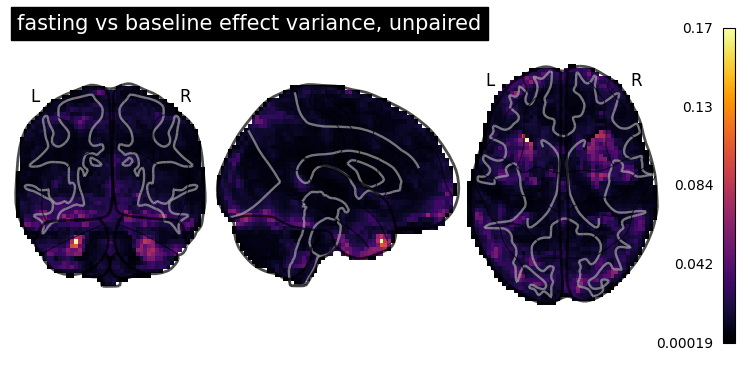

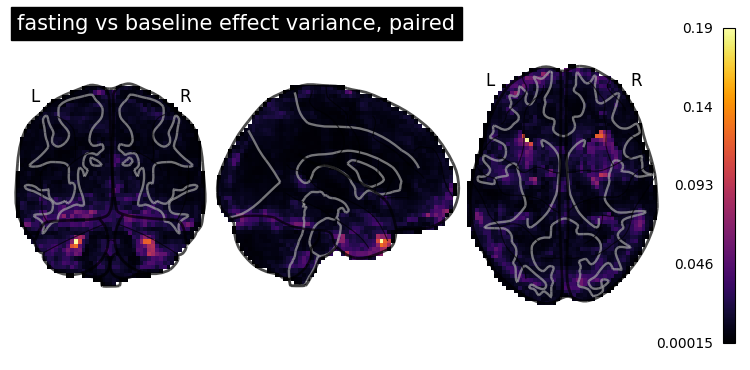

In [19]:
plot_glass_brain(
    stat_maps_unpaired["effect_variance"],
    cmap="inferno",
    title="fasting vs baseline effect variance, unpaired",
)

plot_glass_brain(
    stat_maps_paired["effect_variance"],
    cmap="inferno",
    title="fasting vs baseline effect variance, paired",
)

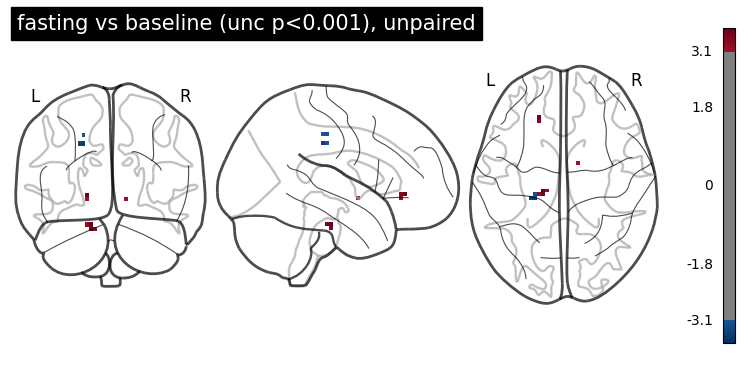

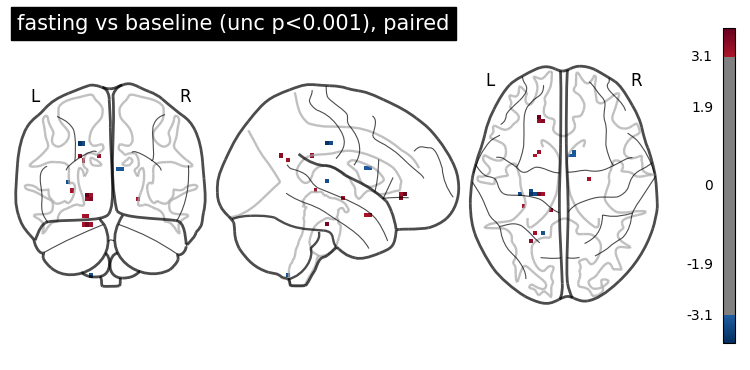

In [20]:
threshold = 3.1  # corresponds to  p < .001, uncorrected
plot_glass_brain(
    stat_maps_unpaired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="fasting vs baseline (unc p<0.001), unpaired",
)

plot_glass_brain(
    stat_maps_paired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="fasting vs baseline (unc p<0.001), paired",
)


### The inf result here means that no voxel in z-map survived the FDR correction at α = 0.05 — in other words, once you control for multiple comparisons, there are no statistically significant effects.

In [21]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_unpaired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

inf


/tmp/ipykernel_3418384/60165119.py:1: UserWarning: The given float value must not exceed 3.6217614938390015. But, you have given threshold=inf.
  _, threshold_corrected = threshold_stats_img(


In [22]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_paired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

inf


/tmp/ipykernel_3418384/551658079.py:1: UserWarning: The given float value must not exceed 3.7670577686420024. But, you have given threshold=inf.
  _, threshold_corrected = threshold_stats_img(


# Social isolation VS baseline
## Social > control

In [23]:
n_subjects = len(social_participants)
n_subjects

22

In [24]:
second_level_input = social_maps + baseline_maps
second_level_input

['/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO01s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO02s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO03s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO04s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO08s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO09s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO10s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO11s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO12s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel//sub-SAXSISO13s/food_gt_contr

In [25]:
condition_effect = np.hstack(([1] * n_subjects, [0] * n_subjects))
condition_effect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
subject_effect

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,

In [27]:
subjects = [p[:-1] for p in social_participants]
subjects

['SAXSISO01',
 'SAXSISO02',
 'SAXSISO03',
 'SAXSISO04',
 'SAXSISO08',
 'SAXSISO09',
 'SAXSISO10',
 'SAXSISO11',
 'SAXSISO12',
 'SAXSISO13',
 'SAXSISO14',
 'SAXSISO15',
 'SAXSISO17',
 'SAXSISO18',
 'SAXSISO19',
 'SAXSISO21',
 'SAXSISO22',
 'SAXSISO24',
 'SAXSISO26',
 'SAXSISO27',
 'SAXSISO28',
 'SAXSISO30']

In [28]:
unpaired_design_matrix = pd.DataFrame(
    {
        "social vs baseline": condition_effect,
        "intercept": 1,
    }
)
unpaired_design_matrix


,social vs baseline,intercept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [29]:
paired_design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=["social vs baseline", *subjects],
)
paired_design_matrix

,social vs baseline,SAXSISO01,SAXSISO02,SAXSISO03,SAXSISO04,SAXSISO08,SAXSISO09,SAXSISO10,SAXSISO11,SAXSISO12,...,SAXSISO17,SAXSISO18,SAXSISO19,SAXSISO21,SAXSISO22,SAXSISO24,SAXSISO26,SAXSISO27,SAXSISO28,SAXSISO30
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'paired design')

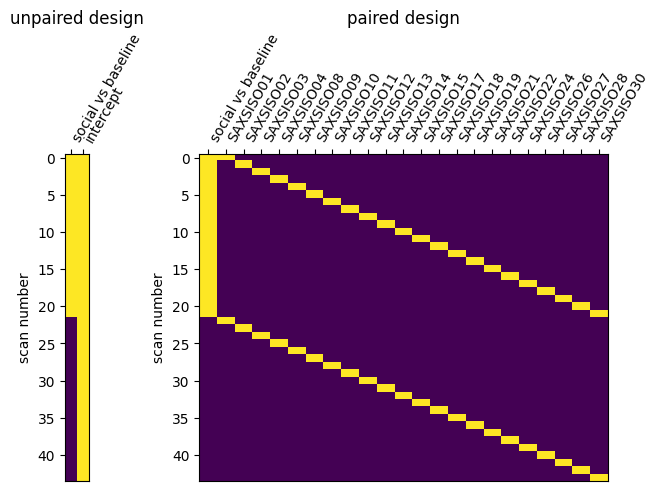

In [30]:
_, (ax_unpaired, ax_paired) = plt.subplots(
    1,
    2,
    gridspec_kw={"width_ratios": [1, 17]},
    constrained_layout=True,
)


plot_design_matrix(unpaired_design_matrix, rescale=False, axes=ax_unpaired)
plot_design_matrix(paired_design_matrix, rescale=False, axes=ax_paired)
ax_unpaired.set_title("unpaired design", fontsize=12)
ax_paired.set_title("paired design", fontsize=12)

In [31]:
second_level_model_unpaired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=unpaired_design_matrix
)

In [32]:
second_level_model_paired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=paired_design_matrix
)

In [33]:
stat_maps_unpaired = second_level_model_unpaired.compute_contrast(
    "social vs baseline", output_type="all"
)
stat_maps_unpaired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7f2b4f1fa1c0>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7f2aaeeff430>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7f2a9ea0e5e0>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7f2aab3c13a0>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7f2aaaeb8340>}

In [34]:
stat_maps_paired = second_level_model_paired.compute_contrast(
    "social vs baseline", output_type="all"
)
stat_maps_paired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7f2b4f20b6a0>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7f2b4f354f70>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7f2b4f20ba90>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7f2aab19d100>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7f2b4f1f3070>}

In [35]:
(
    stat_maps_unpaired["effect_size"].get_fdata()
    - stat_maps_paired["effect_size"].get_fdata()
).max()
# 1.1102230246251565e-15


5.551115123125783e-16

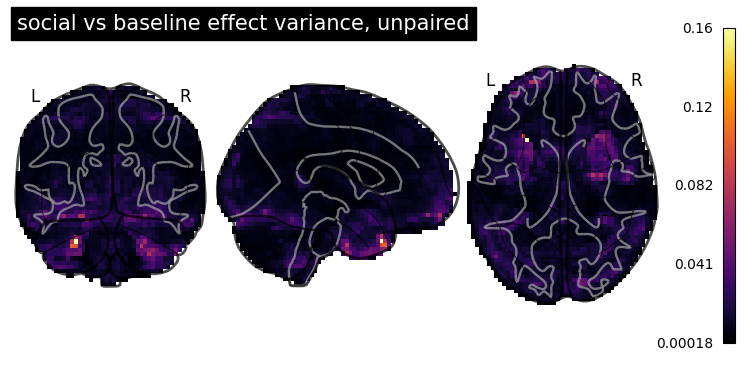

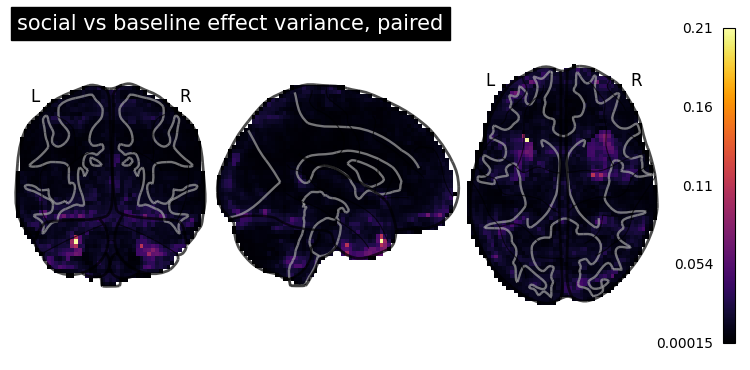

In [36]:
plot_glass_brain(
    stat_maps_unpaired["effect_variance"],
    cmap="inferno",
    title="social vs baseline effect variance, unpaired",
)

plot_glass_brain(
    stat_maps_paired["effect_variance"],
    cmap="inferno",
    title="social vs baseline effect variance, paired",
)

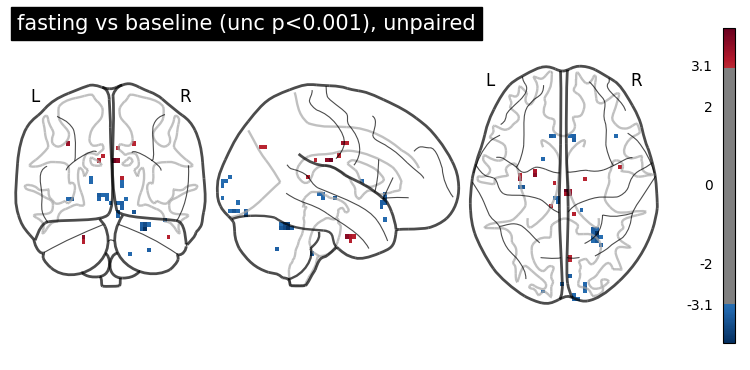

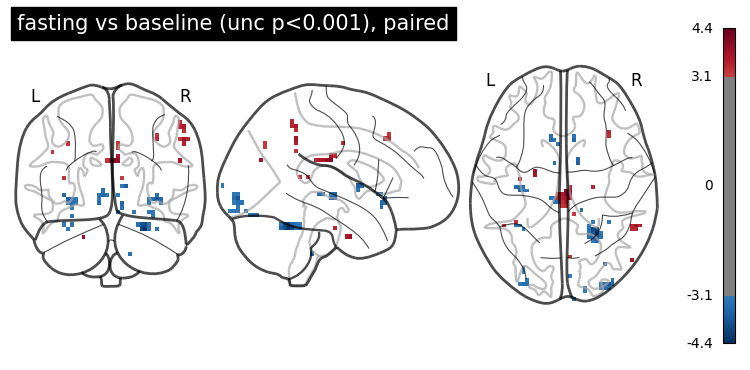

In [37]:
threshold = 3.1  # corresponds to  p < .001, uncorrected
plot_glass_brain(
    stat_maps_unpaired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="fasting vs baseline (unc p<0.001), unpaired",
)

plot_glass_brain(
    stat_maps_paired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="fasting vs baseline (unc p<0.001), paired",
)

In [38]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_unpaired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

inf


/tmp/ipykernel_3418384/60165119.py:1: UserWarning: The given float value must not exceed 4.097133768137496. But, you have given threshold=inf.
  _, threshold_corrected = threshold_stats_img(


In [39]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_paired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

inf


/tmp/ipykernel_3418384/551658079.py:1: UserWarning: The given float value must not exceed 4.442221618084746. But, you have given threshold=inf.
  _, threshold_corrected = threshold_stats_img(
